In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_cost` function below:

In [4]:
def mse(e): # Mean Squared Error
    return .5 * np.mean(e**2)

def mae(e): # Mean Absolute Error
    return np.mean(np.abs(e))

def compute_loss(y, tx, w, mod='MSE'):

    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    e = y - np.dot(tx, w)
    
    if mod == 'MSE': 
        return mse(e)
    
    if mod == 'MAE': 
        return mae(e)
    
    raise InvalidLossFunction

# 2. Grid Search

Fill in the function `grid_search()` below:

In [5]:
def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.
        
    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """
    l1, l2 = len(grid_w0), len(grid_w1)
    losses = np.zeros((l1,l2))
    
    for i in range(l1):
        for j in range(l2):
            losses[i,j] = compute_loss(y,tx,np.array([grid_w0[i],grid_w1[j]]))
    
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678248, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.007 seconds


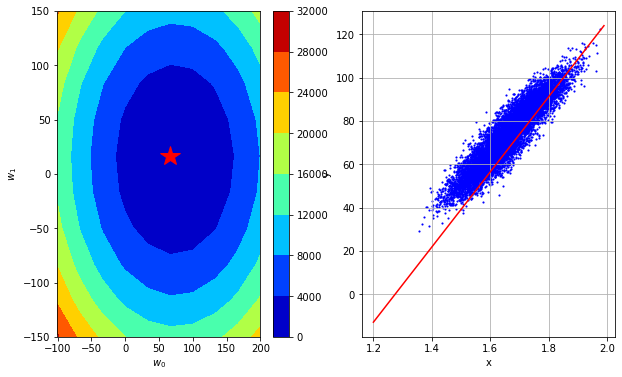

In [6]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [7]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    
    e = y - np.dot(tx, w)
    return (-1/len(y) * np.dot(tx.T,e))

Please fill in the functions `gradient_descent` below:

In [8]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        
        # compute loss, gradient
        gradient = compute_gradient(y,tx,w)
        loss = compute_loss(y,tx,w)
        
        # update w by gradient descent
        w = w - gamma * gradient
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        
        print("GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [9]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 1

# Initialization
w_initial = np.array([0,0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2792.2367127591674, w0=73.29392200210519, w1=13.47971243498897
GD iter. 1/49: loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
GD iter. 2/49: loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
GD iter. 3/49: loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
GD iter. 4/49: loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
GD iter. 5/49: loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
GD iter. 6/49: loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
GD iter. 7/49: loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
GD iter. 8/49: loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
GD iter. 9/49: loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
GD iter. 10/49: loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
GD iter. 11/49: loss=15.3858878688294, w0=73.29392200210519, w1=13.479712434989048
GD iter. 12/4

In [10]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [11]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from just few examples n and their corresponding y_n labels.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    return compute_gradient(y,tx,w)

def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            
            # compute a stochastic gradient and loss
            gradient = compute_stoch_gradient(minibatch_y,minibatch_tx,w)
            loss = compute_loss(minibatch_y,minibatch_tx,w)

            # update w through the stochastic gradient update
            w = w - gamma * gradient

            # store w and loss
            ws.append(w)
            losses.append(loss)

        print("SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
        
    return losses, ws

In [12]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=2179.781191739262, w0=6.602698223816173, w1=-0.5556792178441777
SGD iter. 1/49: loss=1864.2877768277688, w0=12.70890453678623, w1=-4.8246085460561146
SGD iter. 2/49: loss=2361.5211828045676, w0=19.58134396220799, w1=-1.4448893191865286
SGD iter. 3/49: loss=2226.513358273768, w0=26.254444228611554, w1=4.103798616746169
SGD iter. 4/49: loss=1469.7745523805472, w0=31.676205109322815, w1=9.83672466299815
SGD iter. 5/49: loss=1808.8095944571544, w0=37.690869845544036, w1=14.295361654973153
SGD iter. 6/49: loss=874.6520544250803, w0=41.87333814650002, w1=17.62593290716254
SGD iter. 7/49: loss=318.2081792214173, w0=44.396067538335046, w1=22.542649445865308
SGD iter. 8/49: loss=598.6081828463539, w0=47.85614899068947, w1=21.532310780653766
SGD iter. 9/49: loss=143.0506768188695, w0=49.54760207498634, w1=23.83560086023261
SGD iter. 10/49: loss=1013.2671574257769, w0=54.049306546463285, w1=16.500383692181362
SGD iter. 11/49: loss=134.233173847177, w0=55.687800817720756, w1=1

In [13]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [14]:
# Reload data adding outliers (2) and enabling sub-sample
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [15]:
y.shape, tx.shape

((202,), (202, 2))

In [16]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2869.8351145358524, w0=51.84746409844842, w1=7.7244264061924195
GD iter. 1/49: loss=318.2821247015965, w0=67.40170332798297, w1=10.041754328050114
GD iter. 2/49: loss=88.6423556165128, w0=72.06797509684336, w1=10.736952704607411
GD iter. 3/49: loss=67.9747763988552, w0=73.46785662750146, w1=10.945512217574597
GD iter. 4/49: loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631798
GD iter. 6/49: loss=65.93222021235334, w0=74.0516072257859, w1=11.032481534481914
GD iter. 7/49: loss=65.93086421248087, w0=74.06294626618423, w1=11.034170866536945
GD iter. 8/49: loss=65.93074217249236, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=65.93073118889338, w0=74.06736849193958, w1=11.034829706038408
GD iter. 10/49: loss=65.93073020036948, w0=74.06767464603033, w1=11.034875318003895
GD iter. 11/49: loss=65.93073011140233, w0=74.06776649225755, w1=11.034889001593541
GD it

In [17]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [18]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    e = y - np.dot(tx, w)
    return -1/len(y) * np.dot(tx.T, np.sign(e))

In [19]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        
        # compute a subgradient and loss
        gradient = compute_subgradient_mae(y,tx,w)
        loss = compute_loss(y,tx,w,mod='MAE')
        
        # update w
        w = w - gamma * gradient
    
        # store w and loss
        ws.append(w)
        losses.append(loss)
        
        print("SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [20]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(
    y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=74.06780585492638, w0=0.7, w1=6.109524327590712e-16
SubGD iter. 1/499: loss=73.36780585492637, w0=1.4, w1=1.2219048655181425e-15
SubGD iter. 2/499: loss=72.66780585492637, w0=2.0999999999999996, w1=1.832857298277214e-15
SubGD iter. 3/499: loss=71.96780585492638, w0=2.8, w1=2.443809731036285e-15
SubGD iter. 4/499: loss=71.26780585492638, w0=3.5, w1=3.054762163795356e-15
SubGD iter. 5/499: loss=70.56780585492638, w0=4.2, w1=3.665714596554428e-15
SubGD iter. 6/499: loss=69.86780585492637, w0=4.9, w1=4.276667029313499e-15
SubGD iter. 7/499: loss=69.16780585492639, w0=5.6000000000000005, w1=4.887619462072571e-15
SubGD iter. 8/499: loss=68.46780585492637, w0=6.300000000000001, w1=5.498571894831642e-15
SubGD iter. 9/499: loss=67.76780585492638, w0=7.000000000000001, w1=6.109524327590714e-15
SubGD iter. 10/499: loss=67.06780585492638, w0=7.700000000000001, w1=6.720476760349785e-15
SubGD iter. 11/499: loss=66.36780585492637, w0=8.4, w1=7.331429193108857e-15
SubGD iter. 1

In [21]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses, subgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [22]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic SubGradient Descent algorithm (SubSGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            
            # compute a stochastic subgradient and loss
            gradient = compute_subgradient_mae(minibatch_y,minibatch_tx,w)
            loss = compute_loss(minibatch_y,minibatch_tx,w)

            # update w
            w = w - gamma * gradient

            # store w and loss
            ws.append(w)
            losses.append(loss)
        
        print("SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
        
    return losses, ws

In [23]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=1551.0651351917506, w0=0.7, w1=-0.7998307340627095
SubSGD iter. 1/499: loss=3546.885801865966, w0=1.4, w1=-0.2717749185520608
SubSGD iter. 2/499: loss=1216.229152506313, w0=2.0999999999999996, w1=-1.1118024900118717
SubSGD iter. 3/499: loss=3292.3072692308106, w0=2.8, w1=-0.9979821631975591
SubSGD iter. 4/499: loss=3874.1037223019985, w0=3.5, w1=-0.35183492981033837
SubSGD iter. 5/499: loss=1352.396133373898, w0=4.2, w1=-0.9038063617480174
SubSGD iter. 6/499: loss=1325.2696028623623, w0=4.9, w1=-1.941320555561558
SubSGD iter. 7/499: loss=2610.0200189011016, w0=5.6000000000000005, w1=-1.8527930420724321
SubSGD iter. 8/499: loss=1323.760251084596, w0=6.300000000000001, w1=-2.706639312497701
SubSGD iter. 9/499: loss=2293.1039904248933, w0=7.000000000000001, w1=-2.6544789669679902
SubSGD iter. 10/499: loss=1381.389312937049, w0=7.700000000000001, w1=-3.0802651142587294
SubSGD iter. 11/499: loss=1198.964925780386, w0=8.4, w1=-3.2001569277470607
SubSGD iter. 12/499: 

In [24]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses, subsgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>